<a href="https://colab.research.google.com/github/tofa19/DMML-Project/blob/main/Copy_of_Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Essential Libraries ***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tofa19/DMML-Project/cfda92ba4b4b861831da7cfdb0d1017b65781fb8/music_genre.csv')

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# **Data cleaning**

In [ ]:
#deleting unnecessary columns
data.drop(['instance_id', 'artist_name', 'track_name'], axis=1, inplace=True)
data.dtypes

,0
popularity,float64
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
key,object
liveness,float64
loudness,float64
mode,object


In [ ]:
#column gives zero information
data['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', nan, '0/4'], dtype=object)

In [ ]:
data.drop('obtained_date', axis=1, inplace=True)

In [ ]:
#Calculating null values
data.isna().sum()

,0
popularity,5
acousticness,5
danceability,5
duration_ms,5
energy,5
instrumentalness,5
key,5
liveness,5
loudness,5
mode,5


In [ ]:
data[data['music_genre'].isna()]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#deleting empty rows
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
#Object data types features
data.columns[data.dtypes == object]

Index(['key', 'mode', 'tempo', 'music_genre'], dtype='object')

In [ ]:
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')

In [ ]:
data['tempo'] = data.groupby('music_genre')['tempo'].transform(lambda x: x.fillna(x.mean()))

<Axes: >

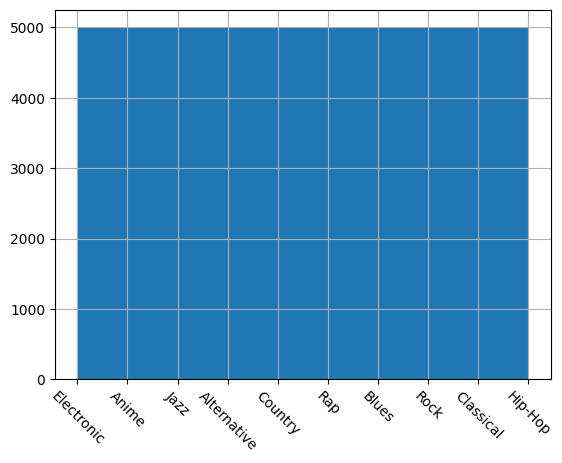

In [ ]:
data['music_genre'].hist(xrot=-45)


# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = data.drop('music_genre', axis=1)
y = data['music_genre']

numerical_cols = X.columns[X.dtypes != object]
categorical_cols = X.columns[X.dtypes == object]

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='if_binary'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X = preprocessor.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)
X.columns = numerical_cols.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))
X.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.654250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170099,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.275596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.276282,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.860227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y = pd.Series(y)
y.value_counts()
y = y.astype('category')
y.sample(5)


,0
42585,3
35324,9
18449,0
32581,2
4735,5


# **MODEL IMPLEMENTATION**

We Will use Three Types of Model to evaluate this Dataset.

# ***Random Forest***


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)

print(X_train.shape)
print(X_test.shape)

(40000, 24)
(10000, 24)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.5565

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px

preds = clf.predict(X_test)


target_names = [str(i) for i in range(min(y), max(y) + 1)]

plt.rcParams ['figure.figsize' ] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [ ]:
print(classification_report(y_test, preds, target_names = target_names))

              precision    recall  f1-score   support

           0       0.41      0.35      0.38      1000
           1       0.77      0.73      0.75      1000
           2       0.59      0.54      0.57      1000
           3       0.85      0.83      0.84      1000
           4       0.58      0.59      0.58      1000
           5       0.65      0.63      0.64      1000
           6       0.38      0.42      0.40      1000
           7       0.56      0.54      0.55      1000
           8       0.35      0.33      0.34      1000
           9       0.46      0.59      0.52      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



# ***LOGISTIC REGRESSION***




In [ ]:
from sklearn.model_selection import train_test_split

test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)

print(X_train.shape)
print(X_test.shape)

(40000, 24)
(10000, 24)


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

model_logReg = LogisticRegression(random_state=random_state)
model_logReg.fit(X_train, y_train)
model_logReg.score(X_test, y_test)

0.525

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

preds = model_logReg.predict(X_test)

plt.rcParams ['figure.figsize' ] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [ ]:
print(classification_report(y_test, preds, target_names = target_names))

              precision    recall  f1-score   support

           0       0.37      0.30      0.33      1000
           1       0.63      0.61      0.62      1000
           2       0.52      0.48      0.50      1000
           3       0.79      0.79      0.79      1000
           4       0.44      0.56      0.49      1000
           5       0.57      0.58      0.57      1000
           6       0.45      0.46      0.46      1000
           7       0.50      0.43      0.46      1000
           8       0.45      0.38      0.41      1000
           9       0.52      0.65      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



# ***XGBoost***

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)
xgb= XGBClassifier(n_estimators=101,random_state=123,learning_rate=0.1)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb.score(X_test,y_test)



0.6137

In [ ]:
preds = xgb.predict(X_test)

plt.rcParams ['figure.figsize' ] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [ ]:
print(classification_report(y_test, preds, target_names = target_names))

              precision    recall  f1-score   support

           0       0.51      0.41      0.45      1000
           1       0.82      0.76      0.79      1000
           2       0.65      0.56      0.60      1000
           3       0.88      0.84      0.86      1000
           4       0.63      0.62      0.63      1000
           5       0.69      0.66      0.68      1000
           6       0.46      0.52      0.49      1000
           7       0.60      0.60      0.60      1000
           8       0.45      0.41      0.43      1000
           9       0.51      0.74      0.61      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



# ***K Nearest Neighbor***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)
number_of_neighbors = np.arange(3, 25, 2)
model_KNN = KNeighborsClassifier()
param_grid = {'n_neighbors': number_of_neighbors}
grid_search = GridSearchCV(model_KNN, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test, y_test)


0.5145

In [ ]:
preds_knn = grid_search.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds_knn), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [ ]:
print(classification_report(y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      1000
           1       0.70      0.66      0.68      1000
           2       0.56      0.44      0.49      1000
           3       0.81      0.83      0.82      1000
           4       0.40      0.60      0.48      1000
           5       0.65      0.51      0.57      1000
           6       0.41      0.49      0.45      1000
           7       0.53      0.43      0.47      1000
           8       0.38      0.31      0.34      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



# ***SVM***

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

test_ratio = 0.2
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = random_state,shuffle = True,stratify = y)
model_svm = SVC(random_state = random_state)
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.5714

In [ ]:
preds_svc = model_svm.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, preds_svc), x = target_names, y = target_names, text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [ ]:
print(classification_report(y_test, preds_svc))

              precision    recall  f1-score   support

           0       0.42      0.35      0.38      1000
           1       0.75      0.72      0.73      1000
           2       0.61      0.54      0.57      1000
           3       0.85      0.83      0.84      1000
           4       0.53      0.56      0.55      1000
           5       0.64      0.60      0.62      1000
           6       0.45      0.53      0.48      1000
           7       0.55      0.52      0.53      1000
           8       0.45      0.37      0.41      1000
           9       0.50      0.70      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



# **Results Comparison**

In [ ]:
models = [ KNeighborsClassifier(),LogisticRegression(random_state=random_state), XGBClassifier(),RandomForestClassifier(),SVC()]
scores = {} # Name == 1%
for model in models:
  model.fit(X_train,y_train)
  scores[type(model).__name__] = model.score(X_test,y_test)*100

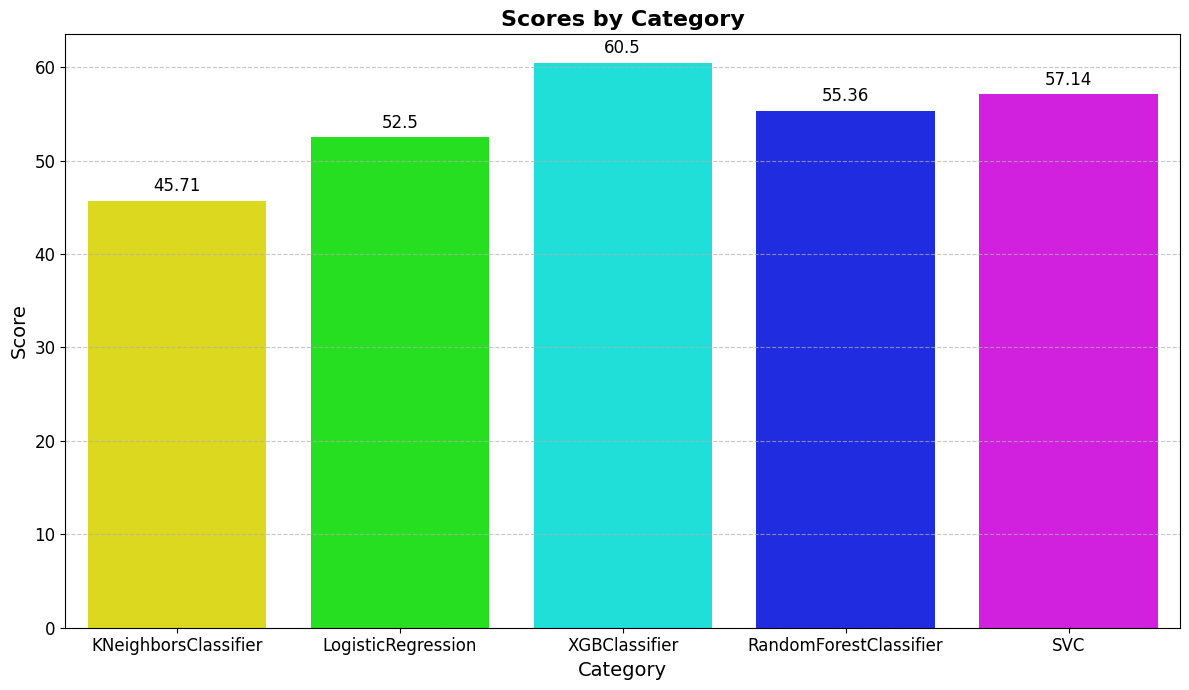

In [ ]:
palette = sns.color_palette("hsv", len(scores))  # Generate a colorful palette

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=palette)

# Add data labels to the bars
for index, value in enumerate(scores.values()):
    ax.text(index, value + 1, str(value), ha='center', fontsize=12, color='black')

# Improve aesthetics
plt.title("Scores by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

We can see that SVC performs better than two other model.So we are going to use SVC model

# **Interface building**

In [ ]:
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display important features
print(feature_importances)
X_train.shape
X_test.shape

             Feature  Importance
0         popularity    0.171102
7           loudness    0.089195
8        speechiness    0.088515
2       danceability    0.087060
1       acousticness    0.084934
5   instrumentalness    0.079740
4             energy    0.078188
9              tempo    0.068062
10           valence    0.067699
3        duration_ms    0.061548
6           liveness    0.050984
23        mode_Minor    0.011322
21             key_G    0.006263
14             key_C    0.006096
11             key_A    0.005971
15            key_C#    0.005907
16             key_D    0.005809
19             key_F    0.005435
13             key_B    0.005239
18             key_E    0.004887
22            key_G#    0.004642
20            key_F#    0.004456
12            key_A#    0.004331
17            key_D#    0.002614


(10000, 24)

In [ ]:
feature_importances = model.feature_importances_

# Create a DataFrame for easy analysis
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Rank features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Select top 8 features
top_features = feature_df.iloc[:8]['Feature'].tolist()

# Subset the X_train dataset
X_train_top8 = X_train[top_features]
X_test_top8 = X_test[top_features]
X_train_top8.shape

(40000, 8)

In [ ]:
mod= XGBClassifier(n_estimators=101,random_state=123,learning_rate=0.1)
mod.fit(X_train_top8,y_train)
y_pred = mod.predict(X_test_top8)
mod.score(X_test_top8,y_test)

0.5897

So for Predicting Interface we are going to use this 8 features

In [ ]:

X_test_top8


,popularity,loudness,speechiness,danceability,acousticness,instrumentalness,energy,tempo
5512,-2.073139,0.022840,-0.624298,0.323344,0.754731,0.880130,-0.569839,0.234634
3428,-0.979318,0.009372,-0.197159,-1.126579,0.036964,0.560529,-0.120030,0.922834
9734,-2.073139,-1.220238,-0.500004,-0.387622,0.201025,2.465842,-1.151945,-0.404336
18226,-0.078525,0.870814,-0.627258,0.239372,-0.895139,-0.511671,0.552794,0.687156
47644,1.337008,0.458834,-0.438843,1.498958,-0.816445,-0.558070,0.178583,-0.615554
...,...,...,...,...,...,...,...,...
5380,-0.657606,0.823271,0.102726,-0.180490,-0.891445,-0.558074,1.350354,-0.615931
18434,0.243187,0.532338,-0.167565,1.627715,-0.731192,-0.558069,0.227721,0.069249
5757,-1.301030,-0.460859,-0.632190,0.166596,1.920735,1.832786,-1.223764,-1.370408
33866,-0.721949,0.352553,-0.558205,-0.202883,-0.887695,-0.543908,1.104660,-1.138847


In [ ]:
popularity = float(input("popularity "))
loudness = float(input("loudness "))
speechiness = float(input("speechiness "))
danceability = float(input("danceability "))
acousticness = float(input("acousticness "))
instrumentalness = float(input("instrumentalness "))
energy = float(input("energy "))
tempo = float(input("tempo "))

popularity 45
loudness 0.01
speechiness 0.25
danceability 0.12
acousticness 0.002
instrumentalness 0.253
energy 0.66
tempo 110


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_top8)
values = scaler.transform([[popularity,loudness,speechiness,danceability,acousticness,instrumentalness,energy,tempo]])

In [ ]:

predict_class = mod.predict(values)

In [ ]:
values

array([[4.50e+01, 1.00e-02, 2.50e-01, 1.20e-01, 2.00e-03, 2.53e-01,
        6.60e-01, 1.10e+02]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(mod.classes_)
le.fit(np.arange(10))
predict_class_transformed = le.inverse_transform(predict_class)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.654250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170099,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.275596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.276282,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.860227,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.950954,-0.799746,1.985998,-1.719534,-0.097351,-0.558074,-0.463366,0.342655,2.016466,-0.752397,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,1.787405,-0.437640,0.843973,0.237874,-0.898692,-0.558074,-0.525234,-0.110376,-0.380642,0.071445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.436214,-0.880107,0.754403,-0.246906,0.617052,-0.558074,-0.314884,0.598865,0.517041,0.381427,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,1.337008,-0.654142,1.252639,0.322687,-0.482901,-0.558074,-0.543794,0.668150,-0.488166,-1.511986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# prompt: i want to see the actual string values of y from the above predicted class